<a href="https://colab.research.google.com/github/sunfflur/frequency-learning/blob/master/kylberg-texture-dataset/Exp_02_a_varyingdatasize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Experiment 02

`Author:` [sunfflur](https://github.com/sunfflur)

> Experiment 02 - varyingdatasize - is an updated version of the main Experiment 02 where we vary the datasize from 100% to 10% of the training data.



---

#### Libraries Import

In [ ]:
s = 23
import os
os.environ['PYTHONHASHSEED']=str(s)
import random
random.seed(s)
from numpy.random import seed
seed(s)
from tensorflow.random import set_seed
set_seed(s)

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Conv1D, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

!pip install tensorflow-addons 
!pip install tensorflow-recommenders

import tensorflow_addons as tfa
import tensorflow_recommenders as tfrs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 10.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 11.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May  2 13:21:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


#### Drive mount

In [ ]:
### TESSSSSST ###

!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 122523 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-37ubuntu0.1_amd64.deb ...
Unpacking w3m (0.5.3-37ubuntu0.1) ...
Setting up w3m (0.5.3-37ubuntu0.1) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for mime-support (3.64ubuntu1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


#### Data preparation

In [ ]:
### data loading ### 
path_train = '/content/drive/MyDrive/Mestrado/Datasets/kylberg-dataset/kylberg_train.npy'
path_ytrain = '/content/drive/MyDrive/Mestrado/Datasets/kylberg-dataset/kylberg_y_train.npy'
path_test = '/content/drive/MyDrive/Mestrado/Datasets/kylberg-dataset/kylberg_test.npy'
path_ytest = '/content/drive/MyDrive/Mestrado/Datasets/kylberg-dataset/kylberg_y_test.npy'

x_train, x_test = np.load(path_train), np.load(path_test)
y_train, y_test = np.load(path_ytrain), np.load(path_ytest)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# adjust dimension and change from array to tensor
new_shape = (576,576)
x_train, x_test = tf.image.resize(x_train, new_shape), tf.image.resize(x_test, new_shape)
y_train, y_test = tf.stack(to_categorical(y_train)), tf.stack(to_categorical(y_test))

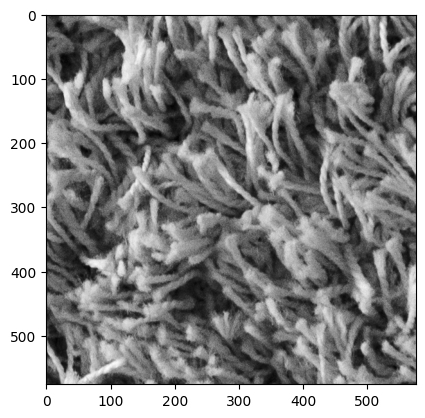

In [ ]:
plt.imshow(tf.squeeze(x_test[0]), cmap='gray') #0-rug1 (controle test)
plt.show()

#### Image Main Functions

In [ ]:
### blocks ###
def slice(image, levels):
  if levels == 0:
    image = tf.transpose(image, [0, 3, 1, 2])
    return image
  iM, iN = image.shape[1], image.shape[2]
  iMc, iNc = int(iM/2), int(iN/2)
  output = tf.stack((image[:, :iMc, :iNc], image[:, :iMc,iNc:], image[:, iMc:,:iNc], image[:, iMc:, iNc:]),-1)
  output = tf.reshape(output,[output.shape[0],output.shape[1],output.shape[2],-1])
  return slice(output, levels-1)

In [ ]:
### DFT ### 
def m_spectrum(image):
  side = image.shape[2]
  inputx = tf.cast(image, tf.complex128) # change dtype to complex64 
  fft = tf.signal.fft2d(inputx) # perform fast fourier transform
  fft_shift = tf.signal.fftshift(fft, axes=(2,3)) # shift the zero-frequency component to the center

  # calculate the magnitude and scale it
  magnitude = tf.math.abs(fft_shift) 
  magnitude = tf.math.divide(magnitude, side**2)
  magnitude = tf.math.log(1+magnitude)

  return magnitude

In [ ]:
### magnitude sums ###
def radial_grouping(image, r):
  iM, iN = image.shape[2], image.shape[3] #image dimension
  iMc, iNc = int(iM/2), int(iN/2) #image center
  A = tf.range(-iMc,iNc)**2
  dists = tf.math.sqrt(tf.cast(A[:,None] + A, dtype=tf.float32))
  dists = tf.reshape(dists, [1,1,image.shape[2],image.shape[3]]) #1,1,128,128
  n = int(iNc/r) #rings number
  r = (r/2)
  magnitude_sums = []
  ring = 0
  for j in range(1, 2*n, 2):
    ring = tf.cast((tf.abs(dists-r*j)<r), dtype=tf.float32)
    if j == 1:
      ring = tf.cast((tf.abs(dists-(r/2)*j)<=(r/2)), dtype=tf.float32)
    mult = tf.multiply(ring,image)
    sum = tf.reduce_sum(mult,axis=(2,3))
    magnitude_sums.append(sum.numpy())
  magnitude_sums = tf.transpose(tf.convert_to_tensor(magnitude_sums))
  magnitude_sums = tf.reshape(magnitude_sums, [magnitude_sums.shape[1], magnitude_sums.shape[2], magnitude_sums.shape[0]])
  magnitude_sums = tf.reshape(magnitude_sums, [magnitude_sums.shape[0], -1])
  return magnitude_sums

In [ ]:
### magnitude sums ###
def square_grouping(image, r):
  iM, iN = image.shape[2], image.shape[3] #img.shape
  iMc, iNc = int(iM/2), int(iN/2) #image center
  n = int(iNc/r) #rings number
  ring = np.full((iM,iN), 0)
  magnitude_sums = []
  for w in range(r, (n*r)+1, r):
    ring[iMc-w:iMc+w,iNc-w:iNc+w] = 1
    ring[iMc-w + r :iMc+w -r ,iNc-w +r :iNc+w -r] = 0
    mult = tf.multiply(ring,image)
    sum = tf.reduce_sum(mult,axis=(2,3))
    magnitude_sums.append(sum.numpy())
  magnitude_sums = tf.transpose(tf.convert_to_tensor(magnitude_sums))
  magnitude_sums = tf.reshape(magnitude_sums, [magnitude_sums.shape[1], magnitude_sums.shape[2], magnitude_sums.shape[0]])
  magnitude_sums = tf.reshape(magnitude_sums, [magnitude_sums.shape[0], -1])
  return magnitude_sums

#### Image Main Functions - Per Image

In [ ]:
### blocks PER IMAGE ###
def slice(images, levels):
  outputs = []
  if levels == 0:
    images = tf.transpose(images, [0, 3, 1, 2])
    return images
  for image in images:
    iM, iN = image.shape[0], image.shape[1] #576,576,1
    iMc, iNc = int(iM/2), int(iN/2) #576/2,576/2
    output = tf.stack((image[:iMc, :iNc], image[:iMc,iNc:], image[iMc:,:iNc], image[iMc:, iNc:]),-1)
    output = tf.reshape(output,[output.shape[0],output.shape[1],-1]) #288,288,4
    outputs.append(output)
  outputs = tf.convert_to_tensor(outputs)
  return slice(outputs, levels-1)

In [ ]:
### DFT PER IMAGE ### 
def m_spectrum(images):
  magnitudes = []
  for image in images:
    side = image.shape[1]
    inputx = tf.cast(image, tf.complex128) # change dtype to complex64 
    fft = tf.signal.fft2d(inputx) # perform fast fourier transform
    fft_shift = tf.signal.fftshift(fft, axes=(1,2)) # shift the zero-frequency component to the center

    # calculate the magnitude and scale it
    magnitude = tf.math.abs(fft_shift) 
    magnitude = tf.math.divide(magnitude, side**2)
    magnitude = tf.math.log(1+magnitude)
    magnitudes.append(magnitude)
  return tf.convert_to_tensor(magnitudes)

In [ ]:
### magnitude sums PER IMAGE ###
def radial_grouping(images, r):
  grouping = []
  for image in images:
    iM, iN = image.shape[1], image.shape[2] #image dimension
    iMc, iNc = int(iM/2), int(iN/2) #image center
    A = tf.range(-iMc,iNc)**2
    dists = tf.math.sqrt(tf.cast(A[:,None] + A, dtype=tf.float64))
    dists = tf.reshape(dists, [1,image.shape[1],image.shape[2]]) #1,512,512
    n = int(iNc/r) #rings number
    magnitude_sums = []
    ring = 0
    for j in range(1, 2*n, 2):
      ring = tf.cast((tf.abs(dists-(r/2)*j)<(r/2)), dtype=tf.float64)
      if j == 1:
        ring = tf.cast((tf.abs(dists-(r/2)*j)<=(r/2)), dtype=tf.float64)
      mult = tf.multiply(ring,image)
      sum = tf.reduce_sum(mult,axis=(1,2))
      magnitude_sums.append(sum.numpy())
    magnitude_sums = tf.convert_to_tensor(magnitude_sums)
    grouping.append(magnitude_sums)
  grouping = tf.convert_to_tensor(grouping)
  grouping = tf.reshape(grouping, [grouping.shape[0], -1])
  return grouping

In [ ]:
### magnitude sums PER IMAGE ###
def square_grouping(images, r):
  grouping = []
  for image in images:
    iM, iN = image.shape[1], image.shape[2] #image dimension
    iMc, iNc = int(iM/2), int(iN/2) #image center
    A = tf.range(-iMc,iNc)**2
    n = int(iNc/r) #rings number
    ring = np.full((iM,iN), 0)
    magnitude_sums = []
    for w in range(r, (n*r)+1, r):
      ring[iMc-w:iMc+w,iNc-w:iNc+w] = 1
      ring[iMc-w + r :iMc+w -r ,iNc-w +r :iNc+w -r] = 0
      mult = tf.multiply(ring,image)
      sum = tf.reduce_sum(mult,axis=(1,2))
      magnitude_sums.append(sum.numpy())
    magnitude_sums = tf.convert_to_tensor(magnitude_sums)
    grouping.append(magnitude_sums)
  grouping = tf.convert_to_tensor(grouping)
  grouping = tf.reshape(grouping, [grouping.shape[0], -1])
  return grouping

#### Data Pre-Process - 3 levels

In [ ]:
class PreProcess():
  def __init__(self, data, level, r): #level = levels number; r = radius (ring width);
    self.data = data #x_train/test
    self.level = level
    self.r = r
  def processing(self):
    conc = []
    for i in range(0, self.level+1):
      sliced_data = slice(self.data, levels=i)
      dft_data = m_spectrum(sliced_data)
      grouping_data = radial_grouping(dft_data, r=self.r) # r = radius (ring width)
      #grouping_data = square_grouping(dft_data, r=self.r) # r = radius (ring width)
      conc.append(grouping_data)
      if i < self.level:
        del sliced_data
        del dft_data
        del grouping_data
    input = tf.concat((conc), axis=1)
    ### data normalization between 0-1
    scaler = MinMaxScaler()
    inp = scaler.fit_transform(input) #N,weights 
    input = tf.convert_to_tensor(inp)
    return input, sliced_data, dft_data

In [ ]:
with tf.device('/CPU:0'):
  input, sliced_data, dft_data = PreProcess(x_train, level=2, r=1).processing() #2 levels means original image + division in 4 blocks + division in 16 blocks (4 blocks again)

In [ ]:
np.save('input_train_exp2_w1_l2_radial.npy', input)

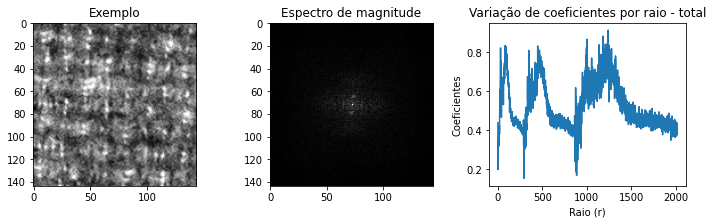

In [ ]:
example = 3
block = 0
x = input[example]

plt.figure(figsize=(12,3))
plt.subplot(131), plt.imshow(sliced_data[example, block,:,:], cmap='gray')
plt.title('Exemplo')
plt.subplot(132), plt.imshow(dft_data[example, block,:,:], cmap='gray')
plt.title('Espectro de magnitude')
plt.subplot(133), plt.plot(x)
plt.title('Variação de coeficientes por raio - total'), plt.xlabel('Raio (r)'), plt.ylabel('Coeficientes')
plt.show()

In [ ]:
with tf.device('/CPU:0'):
  input_test, sliced_data_test, dft_data_test = PreProcess(x_test, level=2, r=1).processing()

In [ ]:
input_test.shape ### test set shape

TensorShape([1120, 2016])

In [ ]:
sliced_data_test.shape #ultima parte do pre-processamento: 16 blocos 144x144

TensorShape([1120, 16, 144, 144])

In [ ]:
np.save('input_test_exp2_w1_l2_radial.npy', input_test)

In [ ]:
!nvidia-smi

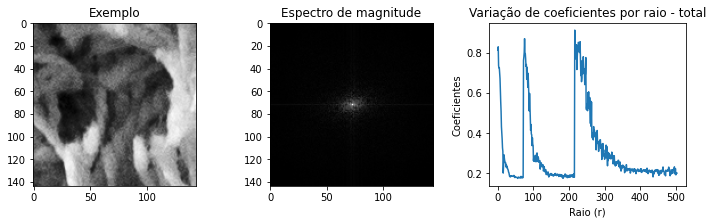

In [ ]:
example = 0
block = 0
x = input_test[example]

plt.figure(figsize=(12,3))
plt.subplot(131), plt.imshow(sliced_data_test[example, block,:,:], cmap='gray')
plt.title('Exemplo')
plt.subplot(132), plt.imshow(dft_data_test[example, block,:,:], cmap='gray')
plt.title('Espectro de magnitude')
plt.subplot(133), plt.plot(x)
plt.title('Variação de coeficientes por raio - total'), plt.xlabel('Raio (r)'), plt.ylabel('Coeficientes')
plt.show()

#### Data Load

In [ ]:
### Saved Pre-Processed data LOAD ###
input = tf.convert_to_tensor(np.load('/content/drive/MyDrive/Mestrado/Experimentos/exp2-KTD/exp2-data/square-grouping/3-levels/input_train_exp2_w1_l2_square.npy')) ### train 96+192+384=672 / 72+144+288=504
input_test = tf.convert_to_tensor(np.load('/content/drive/MyDrive/Mestrado/Experimentos/exp2-KTD/exp2-data/square-grouping/3-levels/input_test_exp2_w1_l2_square.npy')) ### test

In [ ]:
def split(x,y, test_size):
  x_train, x_test, y_train, y_test = train_test_split(np.asarray(input), np.asarray(y), test_size=test_size, stratify=y)
  return x_test, y_test

In [ ]:
y_train.shape

TensorShape([3360, 28])

In [ ]:
x_train_part, y_train_part = split(input, y_train, test_size=0.10)

In [ ]:
input_1 =  input[:,:288]
input_test_1 = input_test[:,:288]

In [ ]:
input_1.shape

TensorShape([3360, 288])

In [ ]:
input_2 =  input[:, :288*3]
input_test_2 = input_test[:,:288*3]

In [ ]:
input_2.shape

TensorShape([3360, 864])

In [ ]:
input_test.shape

TensorShape([1120, 2016])

In [ ]:
input_3 =  input[:,:]
input_test_3 = input_test[:,:]

In [ ]:
input_3.shape

TensorShape([3360, 2016])

#### Custom Layer

In [ ]:
class FreqLayer(Layer):
  def __init__(self, units, kernel_initializer='RandomNormal', extra_layers='Dense', output_type='Dense', **kwargs):
    super().__init__(**kwargs)
    self.units = units
    self.kernel_initializer = kernel_initializer
    self.extra_layers = extra_layers
    self.output_type = output_type
  def get_config(self):
    config = super(FreqLayer, self).get_config()
    config.update({
      "units": self.units,
      "kernel_initializer": self.kernel_initializer,
      "extra_layers": self.extra_layers,
      "output_type": self.output_type
      })
    return config
  def build(self, batch_input_shape):
    if self.extra_layers == 'Dense':
      shape = [batch_input_shape[-1],self.units] #(weights,) - shape for dense training
    else:
      shape = [batch_input_shape[-2],1] #(weights, 1) - shape for convolutional training
    self.kernel = self.add_weight(
        name='kernel',
        shape = shape,
        initializer=self.kernel_initializer,
        trainable=True)
    super().build(batch_input_shape) # must be at the end
  def call(self, X):
    #### fourier and hartley convolution can be the same due to the filter even symmetry ####
    f = tf.expand_dims(X, -1)*self.kernel
    return f
  def compute_output_shape(self, batch_input_shape):
    if self.output_type == 'Dense':
      return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units]) #[examples,1] - dense
    else:
      return tf.TensorShape(batch_input_shape.as_list()[:-2] + [self.units]) #[examples,1] - conv1d

#### Model_3levels

In [ ]:
tf.random.set_seed(s)
init = 'glorot_normal'
function = 'relu'

model = Sequential([
    FreqLayer(1, kernel_initializer=tf.keras.initializers.RandomNormal(mean=-2, stddev=0.01)),
    Dense(128, activation=function,
          kernel_initializer=init, bias_initializer=init),
    Dense(128, activation=function,
          kernel_initializer=init, bias_initializer=init), 
    Dense(28, activation='softmax')])

In [ ]:
### inverse time decay  ###
inversetime_decay = tf.keras.optimizers.schedules.InverseTimeDecay(
  initial_learning_rate = 0.01, #0.01 - opt2 lr=0.001
  decay_steps = input.shape[0]/10,
  decay_rate = 0.005) #0.005 - opt2 dr=0.02/0.03/0.04/0.05/0.09 obtive 99,73

d_m=0.8 #momentum - dense layers

### optimizers ###
opt0 = SGD(learning_rate=inversetime_decay, momentum=d_m) #0.001 
opt1 = RMSprop(learning_rate=inversetime_decay, momentum=d_m) #lr=0.001 dr=0.02
opt2 = Adam(learning_rate=inversetime_decay) #lr=0.001 dr=0.02
opt3 = Nadam(learning_rate=0.001) #lr=0.001 dr=0.02 //does not support scheduled decay
opt4 = tfrs.experimental.optimizers.CompositeOptimizer([
      (SGD(learning_rate=inversetime_decay, momentum=0.0), lambda: [model.layers[0].kernel]),
      (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[1].weights),
      (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[2].weights),
      (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[3].weights)])
opt5 = tfrs.experimental.optimizers.CompositeOptimizer([
      (RMSprop(learning_rate=inversetime_decay, momentum=0.0), lambda: [model.layers[0].kernel]),
      (RMSprop(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[1].weights),
      (RMSprop(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[2].weights),
      (RMSprop(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[3].weights)])
opt6 = tfa.optimizers.AdamW(weight_decay = 1/4*0.001)
opt7 = tfa.optimizers.COCOB(alpha=1000)
opt8 = tfa.optimizers.LAMB(learning_rate=0.001)

model.compile(optimizer=opt4, loss='categorical_crossentropy', metrics=['accuracy'])
#earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=500) # patience = 15
history = model.fit(input, y_train, epochs=500, batch_size=10, verbose=1, shuffle=True)

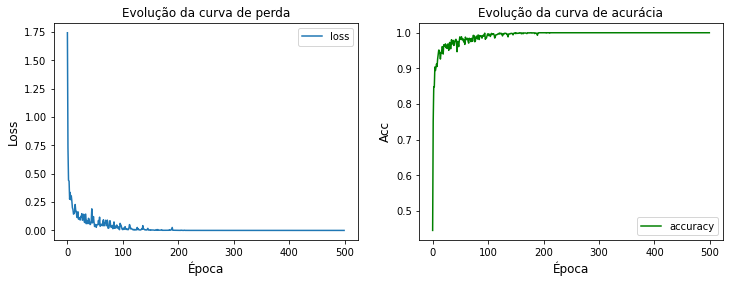

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121), plt.plot(history.history['loss'], label='loss')
plt.xlabel('Época', fontsize=12), plt.ylabel('Loss', fontsize=12)
plt.title('Evolução da curva de perda')
plt.legend()
plt.subplot(122), plt.plot(history.history['accuracy'], label = 'accuracy', color='green')
plt.xlabel('Época', fontsize=12), plt.ylabel('Acc', fontsize=12)
plt.title('Evolução da curva de acurácia')
plt.legend()
plt.show()

In [ ]:
### TEST ACC ###
scores = model.evaluate(input_test, y_test)
print('\n%s : %.2f%%' % (model.metrics_names[1], scores[1] * 100))

35/35 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9973

accuracy : 99.73%


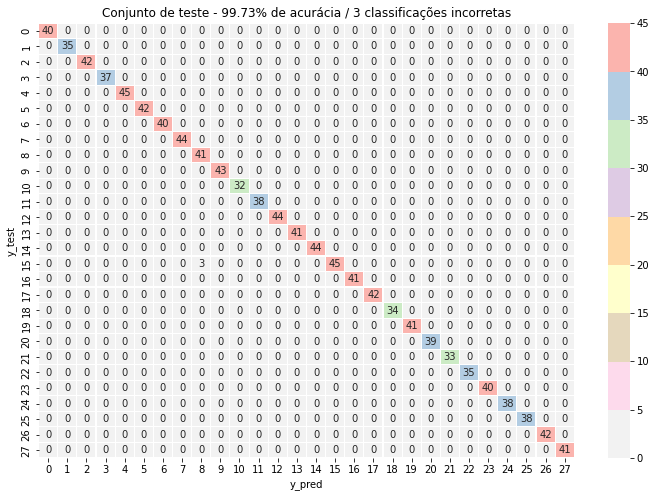

In [ ]:
y_pred = model.predict(input_test)
plt.figure(figsize = (12,8))
cm = confusion_matrix(tf.argmax(y_test, axis=1), tf.argmax(y_pred, axis=1))
acc = np.trace(cm)/input_test.shape[0] * 100
erros = tf.reduce_sum(cm)-tf.linalg.trace(cm)
plt.title('Conjunto de teste - %.2f%% de acurácia / %d classificações incorretas' % (acc, erros))
sn.heatmap(cm, cmap='Pastel1_r', linewidths=.1, annot=True)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [ ]:
dic = {0:'blanket1',1:'blanket2',2:'canvas1',3:'ceiling1',4:'ceiling2',5:'cushion1',
       6:'floor1',7:'floor2',8:'grass1',9:'lentils1',10:'linseeds1',11:'oatmeal1',
       12:'pearlsugar1',13:'rice1',14:'rice2',15:'rug1',16:'sand1',17:'scarf1',
       18:'scarf2',19:'screen1',20:'seat1',21:'seat2',22:'sesameseeds1',23:'stone1',
       24:'stone2',25:'stone3',26:'stoneslab1',27:'wall1'}

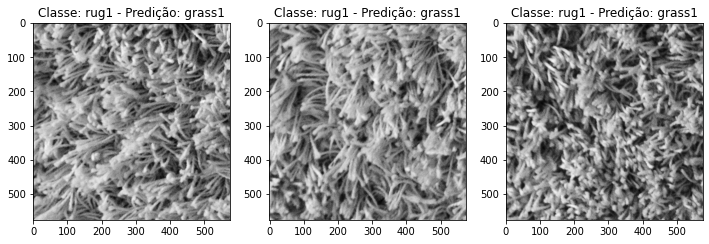

In [ ]:
dif = tf.argmax(y_test, axis=1)-tf.argmax(y_pred, axis=1)
indices = np.where(dif!=0)[0]

plt.figure(figsize=(12,6))
plt.subplot(131), plt.imshow(tf.squeeze(x_test[indices[0]]), cmap='gray')
r1 = tf.argmax(y_test, axis=1)[indices[0]]
f1 = tf.argmax(y_pred, axis=1)[indices[0]]
plt.title('Classe: %s - Predição: %s' % (dic[int(r1)], dic[int(f1)]))
plt.subplot(132), plt.imshow(tf.squeeze(x_test[indices[1]]), cmap='gray')
r2 = tf.argmax(y_test, axis=1)[indices[1]]
f2 = tf.argmax(y_pred, axis=1)[indices[1]]
plt.title('Classe: %s - Predição: %s' % (dic[int(r2)], dic[int(f2)]))
plt.subplot(133), plt.imshow(tf.squeeze(x_test[indices[2]]), cmap='gray')
r3 = tf.argmax(y_test, axis=1)[indices[2]]
f3 = tf.argmax(y_pred, axis=1)[indices[2]]
plt.title('Classe: %s - Predição: %s' % (dic[int(r3)], dic[int(f3)]))
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
freq_layer (FreqLayer)       (None, 2016)              2016      
_________________________________________________________________
dense (Dense)                (None, 128)               258176    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 28)                3612      
Total params: 280,316
Trainable params: 280,316
Non-trainable params: 0
_________________________________________________________________


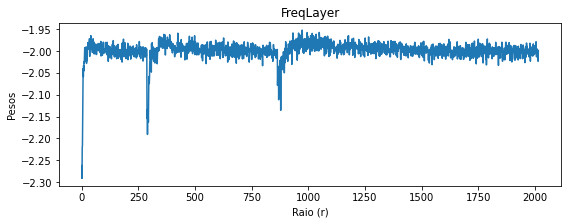

In [ ]:
plt.figure(figsize=(9,3))
plt.plot(model.get_weights()[0])
plt.title('FreqLayer')
plt.xlabel('Raio (r)'), plt.ylabel('Pesos')
plt.show()

##### VARYING DATA SIZES #####

In [ ]:
tf.random.set_seed(s)
init = 'glorot_normal'
function = 'relu'

model = Sequential([
    FreqLayer(1, kernel_initializer=tf.keras.initializers.RandomNormal(mean=-2, stddev=0.01)),
    Dense(128, activation=function,
          kernel_initializer=init, bias_initializer=init),
    Dense(128, activation=function,
          kernel_initializer=init, bias_initializer=init), 
    Dense(28, activation='softmax')])

In [ ]:
#earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=500) # patience = 15
acc=[]
percents = [0.1, 0.25, 0.5, 0.75, 1.00]
for i in percents:
  print("Execucao {}".format(i))
  tf.random.set_seed(s)
  init = 'glorot_normal'
  function = 'relu'

  model = Sequential([
      FreqLayer(1, kernel_initializer=tf.keras.initializers.RandomNormal(mean=-2, stddev=0.01)),
      Flatten(),
      Dense(128, activation=function,
            kernel_initializer=init, bias_initializer=init),
      Dense(128, activation=function,
            kernel_initializer=init, bias_initializer=init), 
      Dense(28, activation='softmax')])
  ### inverse time decay  ###
  inversetime_decay = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate = 0.01, #0.01 - opt2 lr=0.001
    decay_steps = input.shape[0]/10,
    decay_rate = 0.005) #0.005 - opt2 dr=0.02/0.03/0.04/0.05/0.09 obtive 99,73

  d_m=0.8 #momentum - dense layers

  ### optimizers ###
  opt0 = SGD(learning_rate=inversetime_decay, momentum=d_m) #0.001 
  opt1 = RMSprop(learning_rate=inversetime_decay, momentum=d_m) #lr=0.001 dr=0.02
  opt2 = Adam(learning_rate=inversetime_decay) #lr=0.001 dr=0.02
  opt3 = Nadam(learning_rate=0.001) #lr=0.001 dr=0.02 //does not support scheduled decay
  opt4 = tfrs.experimental.optimizers.CompositeOptimizer([
        (SGD(learning_rate=inversetime_decay, momentum=0.0), lambda: [model.layers[0].kernel]),
        (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[1].weights),
        (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[2].weights),
        (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[3].weights),
        (SGD(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[4].weights)])
  opt5 = tfrs.experimental.optimizers.CompositeOptimizer([
        (RMSprop(learning_rate=inversetime_decay, momentum=0.0), lambda: [model.layers[0].kernel]),
        (RMSprop(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[1].weights),
        (RMSprop(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[2].weights),
        (RMSprop(learning_rate=inversetime_decay, momentum=d_m), lambda: model.layers[3].weights)])
  opt6 = tfa.optimizers.AdamW(weight_decay = 1/4*0.001)
  opt7 = tfa.optimizers.COCOB(alpha=1000)
  opt8 = tfa.optimizers.LAMB(learning_rate=0.001)

  model.compile(optimizer=opt4, loss='categorical_crossentropy', metrics=['accuracy'])
  if i != 1.00:
    print('<1')
    input_half, y_train_half = split(input,y_train, i) #0.10*
  else:
    print("Dataset Completo")
    input_half,y_train_half = input,y_train
  history = model.fit(input_half, y_train_half, epochs=500, validation_split=0.05, batch_size=10, verbose=0, shuffle=True)
  scores = model.evaluate(input_test, y_test)
  print('\n%s : %.2f%%' % (model.metrics_names[1], scores[1] * 100))
  acc.append(scores[1])

Execucao 0.1
<1
35/35 [==============================] - 0s 2ms/step - loss: 0.1912 - accuracy: 0.9670

accuracy : 96.70%
Execucao 0.25
<1
35/35 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9812

accuracy : 98.12%
Execucao 0.5
<1
35/35 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9893

accuracy : 98.93%
Execucao 0.75
<1
35/35 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9937

accuracy : 99.37%
Execucao 1.0
Dataset Completo
35/35 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9982

accuracy : 99.82%


In [ ]:
np.savetxt('/content/drive/MyDrive/Mestrado/Experimentos/exp2-KTD/exp2-pynb/acc_exp2_asoc_fft.txt', acc)